# Financial Technical Analysis with DataFrames, PyTorch, Pandas

In [1]:
from locale import normalize
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from cycler import cycler
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import datetime as dt

m2_file = "../_data/WM2NS.csv"   # In billions of dollars
#data_file = "../_data/GDPbyCountry1999-2022.csv"  # In dollars
normalizeAmount = 1_000_000_000_000

m2 = pd.read_csv(m2_file)
#df = pd.read_csv(data_file)

In [55]:
df.tail()

,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
175,Venezuela,97.977,117.153,122.872,92.889,83.442,112.8,143.443,181.608,219.372,...,403.123,409.562,131.855,133.534,144.227,155.096,170.41,184.364,44.893,43.546
176,Vietnam,28.684,31.196,32.504,35.148,39.63,45.548,53.053,60.995,68.298,...,135.729,148.914,198.805,214.75,229.845,247.415,265.987,287.257,368.002,415.493
177,"Yemen, Republic of",7.53,9.561,9.533,9.985,11.869,13.565,15.193,18.7,21.657,...,40.003,42.687,0,0,0,0,0,0,0,0
178,Zambia,3.132,3.238,3.64,3.775,4.326,5.44,7.271,10.942,10.104,...,21.829,23.613,24.466,25.158,27.17,29.911,32.957,36.316,21.699,23.967
179,Zimbabwe,5.963,8.136,12.883,30.856,10.515,4.7,4.552,5.54,18.281,...,6.214,6.851,13.905,14.292,14.994,15.736,16.609,17.529,25.791,27.806


In [2]:
tickers = ['TSLA', 'AAPL', '^GSPC']
start = dt.datetime(2018,1,1)
data = pdr.get_data_yahoo(tickers,start)
data = data['Adj Close']
data = data.dropna()

data.tail()    #Removes weekend NaaN due to BTC being open 24-hours

Symbols,TSLA,AAPL,^GSPC
Date,,,
2022-09-19,309.070007,154.479996,3899.889893
2022-09-20,308.730011,156.899994,3855.929932
2022-09-21,300.799988,153.720001,3789.929932
2022-09-22,288.589996,152.740005,3757.989990
2022-09-23,275.329987,150.429993,3693.229980


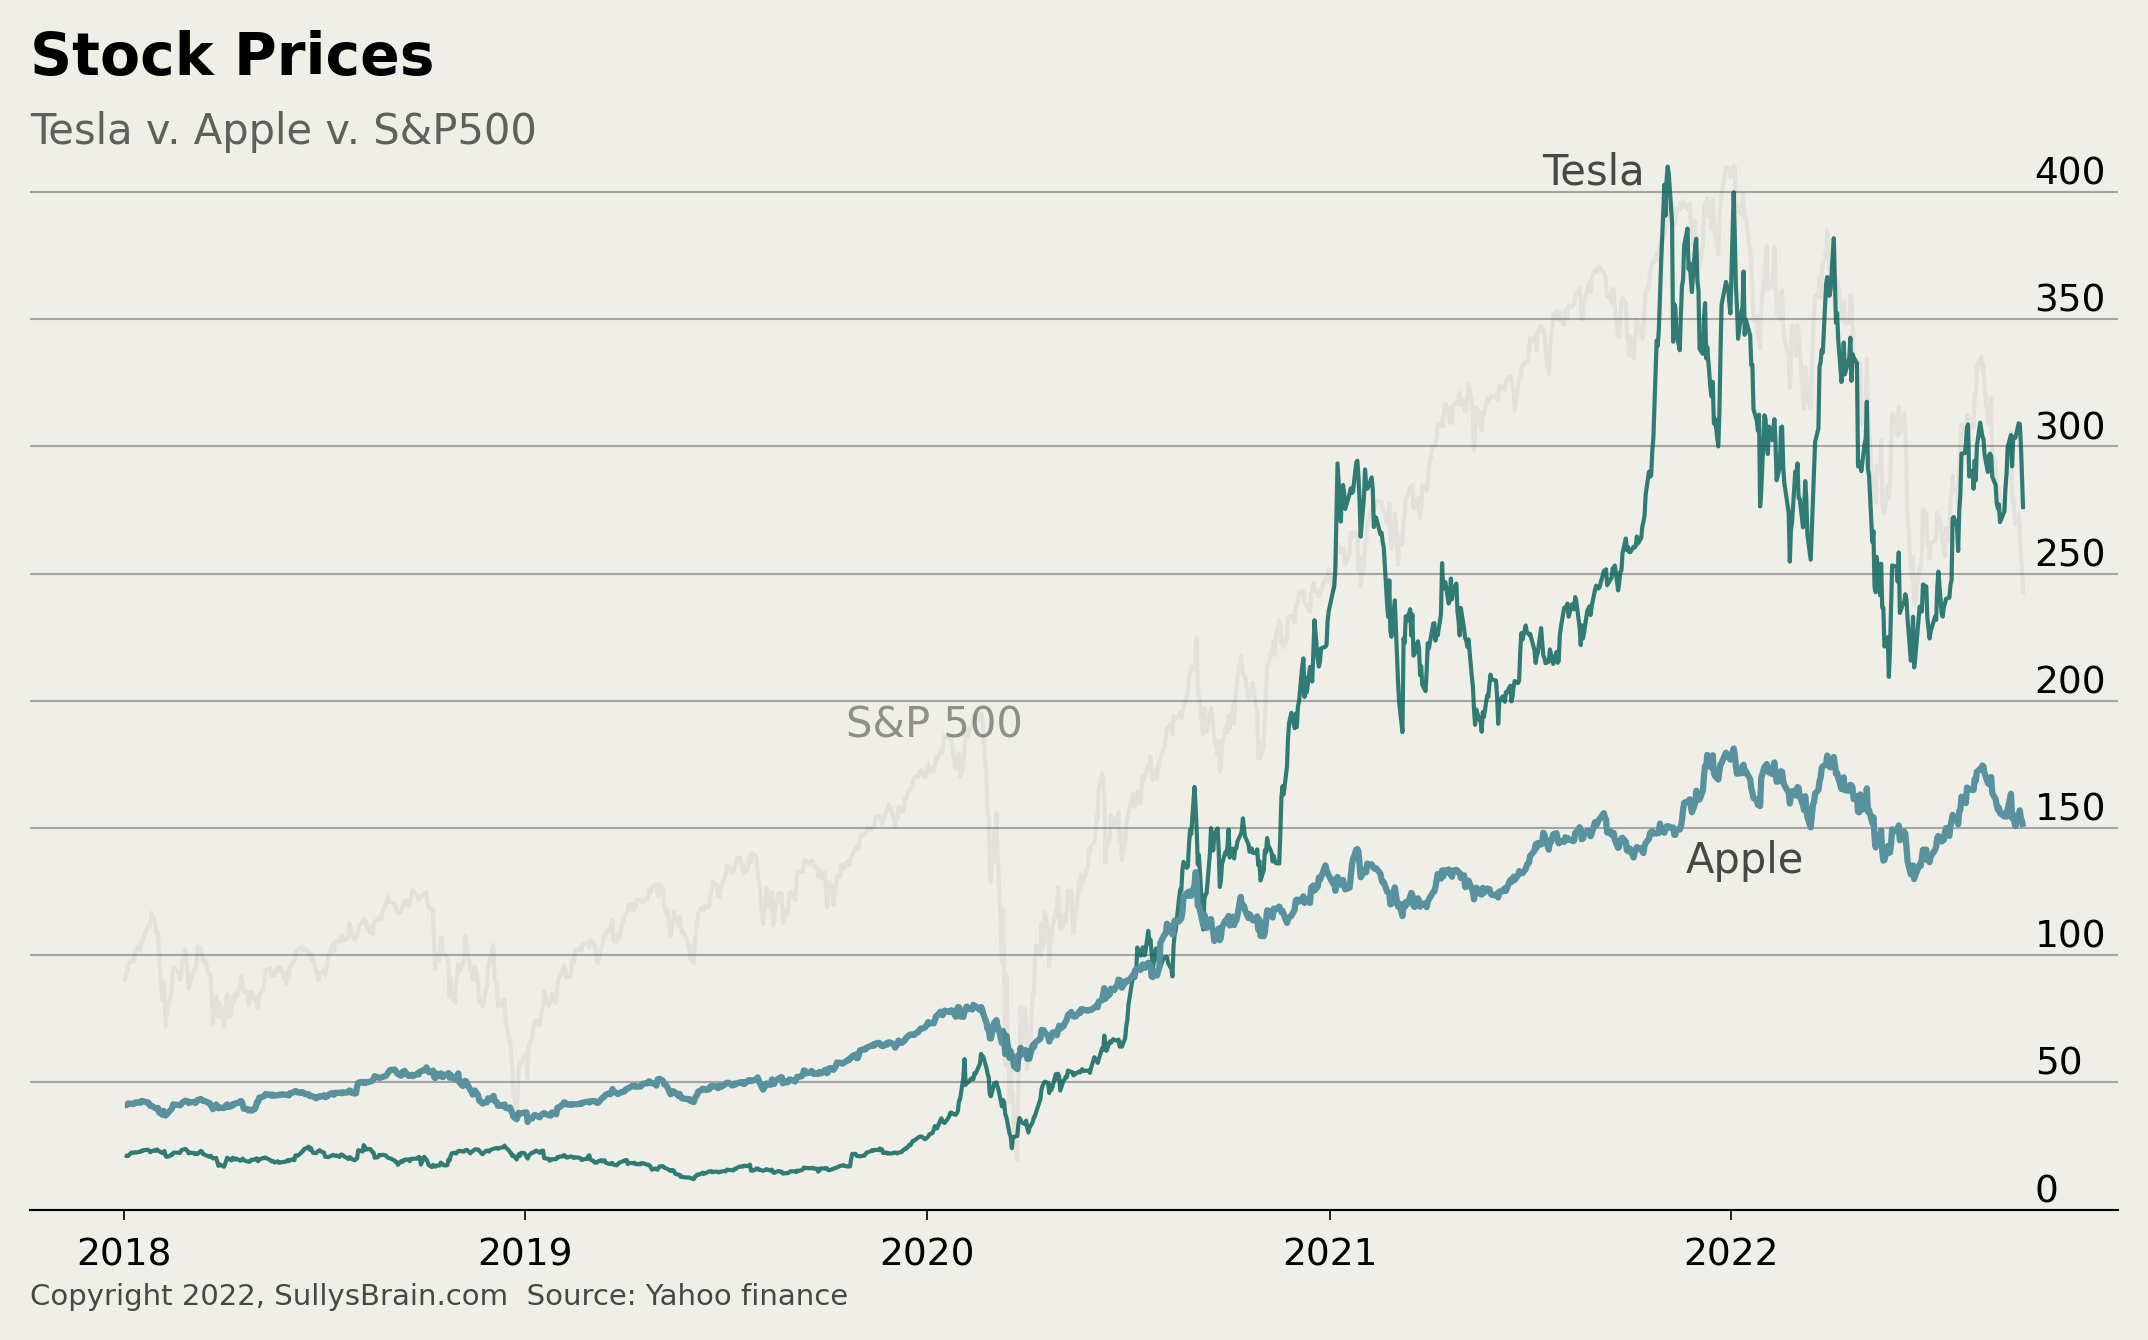

In [4]:
plt.style.use('../matplotlib/_stylesheets/matplotlib-stylesheet-economist.mplstyle')

fig, ax = plt.subplots()
tesla = data['TSLA']
apple = data['AAPL']
sp500 = data['^GSPC']

ax.plot(data['TSLA'], label='Tesla', alpha=0.8, linewidth=2)
ax.plot(data['AAPL'], label='Apple')

ax2 = ax.twinx()
ax2.axis('off')
ax2.plot(sp500, label='SP500', color='#000000', linewidth=2, alpha=0.05)
ax2.grid(False)

ax.set_title("Stock Prices")
ax.set_ylim(0)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

# Add in title and subtitle
ax.text(x=.08, y=.86, 
        s="Tesla v. Apple v. S&P500", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=20, 
        alpha=.6)

# Set source text
ax.text(x=.08, y=0, 
        s="""Copyright 2022, SullysBrain.com  Source: Yahoo finance""", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=14, 
        alpha=.7)

# Label the lines directly
ax.text(x=.71, y=.83, s="""Tesla""", 
        transform=fig.transFigure, ha='left', fontsize=20, alpha=.7)
ax.text(x=.77, y=.32, s="""Apple""", 
        transform=fig.transFigure, ha='left', fontsize=20, alpha=.7)
ax.text(x=.42, y=.42, s="""S&P 500""", 
        transform=fig.transFigure, ha='left', fontsize=20, alpha=.4)

# Export plot as high resolution PNG
#plt.savefig('stockPrice_tsla.png')
plt.show()

In [58]:
gdp_data = pd.read_csv("../_data/GDPbyCountry1999-2022.csv", sep=',', header=0, thousands=",")
gdp_data.set_index("Country", inplace=True)
gdp_data = gdp_data.T
gdp_data.head()

Country,"Afghanistan, Rep. of.",Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,"Yemen, Republic of",Zambia,Zimbabwe
1999,0.000,3.444,48.845,6.153,0.652,283.523,1.845,401.782,213.390,4.581,...,1467.03,9268.43,20.913,17.041,0.251,97.977,28.684,7.530,3.132,5.963
2000,0.000,3.695,54.749,9.135,0.678,284.204,1.912,390.017,194.407,5.273,...,1445.19,9816.98,20.086,13.717,0.245,117.153,31.196,9.561,3.238,8.136
2001,0.000,4.096,55.181,8.936,0.710,268.697,2.118,368.191,193.345,5.708,...,1435.63,10127.95,18.561,11.632,0.235,122.872,32.504,9.533,3.640,12.883
2002,4.084,4.456,57.053,11.386,0.718,97.732,2.376,412.901,208.566,6.236,...,1574.47,10469.60,12.089,9.657,0.230,92.889,35.148,9.985,3.775,30.856
2003,4.585,5.600,68.013,13.956,0.754,127.643,2.807,527.588,255.842,7.276,...,1814.64,10960.75,11.211,10.129,0.280,83.442,39.630,11.869,4.326,10.515


Country,"Afghanistan, Rep. of.",Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,"Yemen, Republic of",Zambia,Zimbabwe
1999,0.000,3.444,48.845,6.153,0.652,283.523,1.845,401.782,213.390,4.581,...,1467.03,9268.43,20.913,17.041,0.251,97.977,28.684,7.530,3.132,5.963
2000,0.000,3.695,54.749,9.135,0.678,284.204,1.912,390.017,194.407,5.273,...,1445.19,9816.98,20.086,13.717,0.245,117.153,31.196,9.561,3.238,8.136
2001,0.000,4.096,55.181,8.936,0.710,268.697,2.118,368.191,193.345,5.708,...,1435.63,10127.95,18.561,11.632,0.235,122.872,32.504,9.533,3.640,12.883
2002,4.084,4.456,57.053,11.386,0.718,97.732,2.376,412.901,208.566,6.236,...,1574.47,10469.60,12.089,9.657,0.230,92.889,35.148,9.985,3.775,30.856
2003,4.585,5.600,68.013,13.956,0.754,127.643,2.807,527.588,255.842,7.276,...,1814.64,10960.75,11.211,10.129,0.280,83.442,39.630,11.869,4.326,10.515


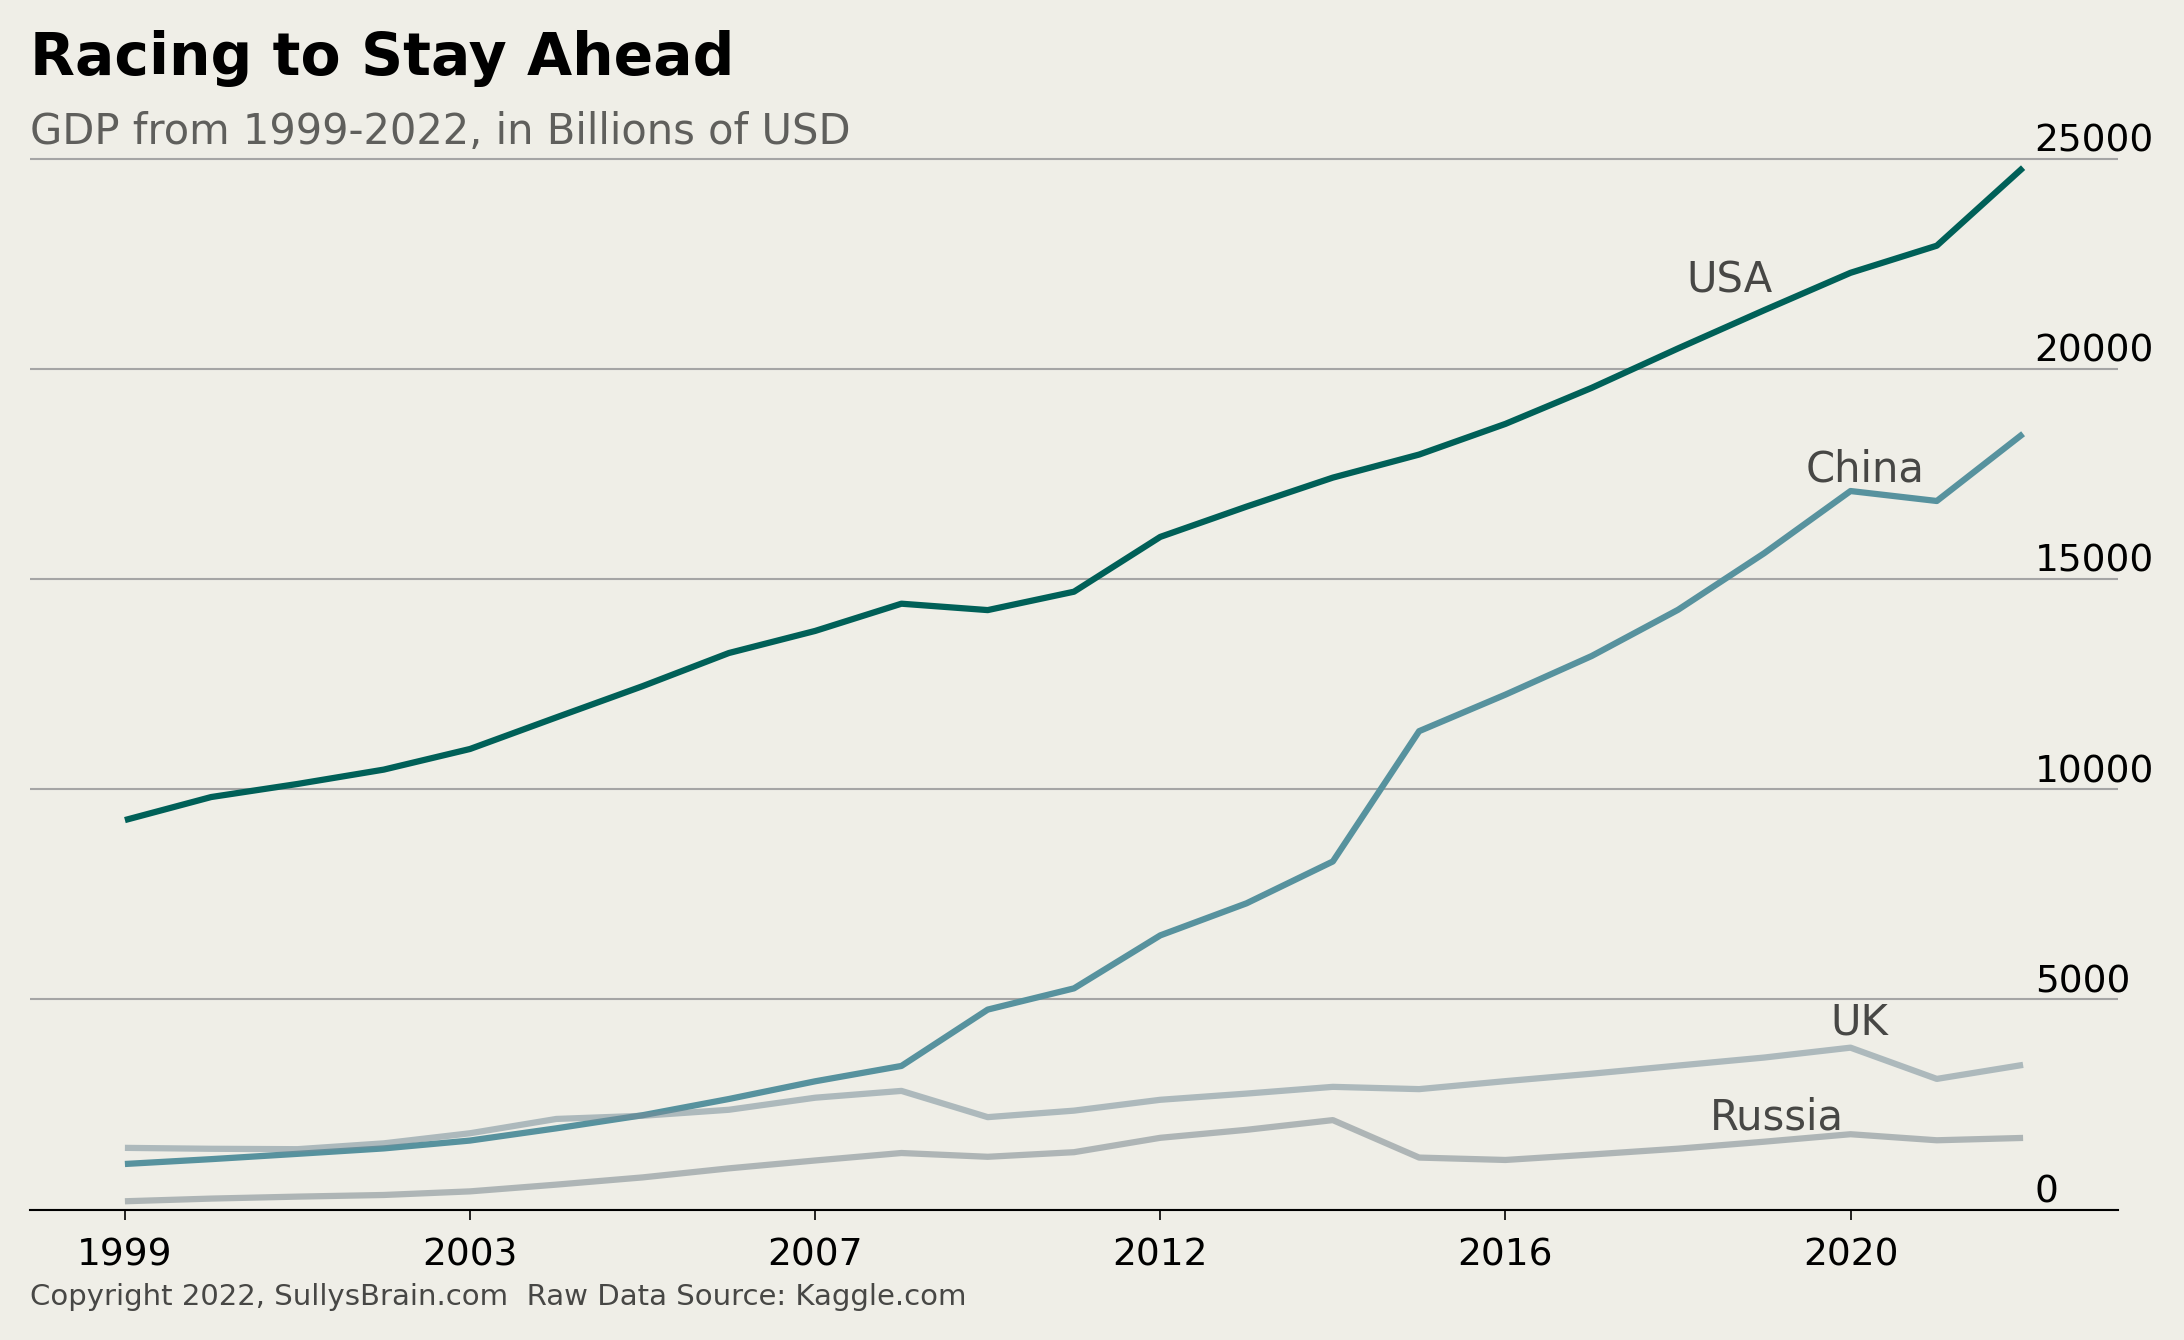

In [78]:
# GDP

plt.style.use('../matplotlib/_stylesheets/matplotlib-stylesheet-economist.mplstyle')

fig, ax = plt.subplots()
usa = gdp_data['United States']
china = gdp_data['China']
uk = gdp_data['United Kingdom']
russia = gdp_data['Russia']
normalizeAmount = 1  #1_000_000_000_000
ax.plot(usa / normalizeAmount, label='USA')
ax.plot(china / normalizeAmount, label='China')
ax.plot(uk / normalizeAmount, label='UK')
ax.plot(russia / normalizeAmount, label='Russia')

ax.set_title("Racing to Stay Ahead")
ax.set_ylim(0)
myXLabels = mtick.MultipleLocator(4)
ax.xaxis.set_major_locator(myXLabels)

# Add in title and subtitle
ax.text(x=.08, y=.86, 
        s="GDP from 1999-2022, in Billions of USD", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=20, 
        alpha=.6)

# Set source text
ax.text(x=.08, y=0, 
        s="""Copyright 2022, SullysBrain.com  Raw Data Source: Kaggle.com""", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=14, 
        alpha=.7)

# Label the lines directly
ax.text(x=.77, y=.75, s="""USA""", 
        transform=fig.transFigure, ha='left', fontsize=20, alpha=.7)
ax.text(x=.82, y=.61, s="""China""", 
        transform=fig.transFigure, ha='left', fontsize=20, alpha=.7)
ax.text(x=.83, y=.2, s="""UK""", 
        transform=fig.transFigure, ha='left', fontsize=20, alpha=.7)
ax.text(x=.78, y=.13, s="""Russia""", 
        transform=fig.transFigure, ha='left', fontsize=20, alpha=.7)

# Export plot as high resolution PNG
plt.savefig('gdp_rising_above.png')
gdp_data.head()